## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  12.672140  1228.494278  0.205404   9.622233  1.302557
1   6.342742   783.100463  0.542057   9.061380  1.598893
2  33.724330   658.150431  0.423910   7.115011  1.477557
3  93.772940   136.225801  0.623064   2.613652  0.636375
4  38.460045   967.391844  0.736017  10.499560  1.591551


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.98408 | train_mse: 6.04458 | train_mae: 1.49857 |  0:00:00s


epoch 1  | loss: 1.08391 | train_mse: 6.68343 | train_mae: 1.80358 |  0:00:00s
epoch 2  | loss: 0.5766  | train_mse: 12.02304| train_mae: 2.26282 |  0:00:00s


epoch 3  | loss: 0.60775 | train_mse: 9.86988 | train_mae: 2.0685  |  0:00:01s
epoch 4  | loss: 0.56537 | train_mse: 13.53241| train_mae: 2.45057 |  0:00:01s


epoch 5  | loss: 0.60319 | train_mse: 11.51379| train_mae: 2.22926 |  0:00:01s
epoch 6  | loss: 0.49843 | train_mse: 11.094  | train_mae: 2.15772 |  0:00:01s
epoch 7  | loss: 0.38704 | train_mse: 9.62934 | train_mae: 1.99945 |  0:00:01s


epoch 8  | loss: 0.32413 | train_mse: 5.65834 | train_mae: 1.48185 |  0:00:01s
epoch 9  | loss: 0.38409 | train_mse: 2.01119 | train_mae: 0.87134 |  0:00:01s


epoch 10 | loss: 0.33218 | train_mse: 0.81267 | train_mae: 0.60306 |  0:00:01s
epoch 11 | loss: 0.66037 | train_mse: 0.43261 | train_mae: 0.43772 |  0:00:01s


epoch 12 | loss: 0.34023 | train_mse: 0.32623 | train_mae: 0.41899 |  0:00:02s
epoch 13 | loss: 0.43699 | train_mse: 0.46167 | train_mae: 0.49084 |  0:00:02s


epoch 14 | loss: 0.3199  | train_mse: 0.42927 | train_mae: 0.47738 |  0:00:02s
epoch 15 | loss: 0.23051 | train_mse: 0.35335 | train_mae: 0.45127 |  0:00:02s


epoch 16 | loss: 0.30503 | train_mse: 0.26861 | train_mae: 0.39469 |  0:00:02s
epoch 17 | loss: 0.237   | train_mse: 0.19965 | train_mae: 0.31904 |  0:00:02s


epoch 18 | loss: 0.22056 | train_mse: 0.23372 | train_mae: 0.36921 |  0:00:02s
epoch 19 | loss: 0.23901 | train_mse: 0.24038 | train_mae: 0.37098 |  0:00:03s
epoch 20 | loss: 0.24222 | train_mse: 0.19696 | train_mae: 0.31968 |  0:00:03s


epoch 21 | loss: 0.17868 | train_mse: 0.1616  | train_mae: 0.30725 |  0:00:03s
epoch 22 | loss: 0.18893 | train_mse: 0.26542 | train_mae: 0.39309 |  0:00:03s
epoch 23 | loss: 0.29806 | train_mse: 0.34949 | train_mae: 0.44712 |  0:00:03s


epoch 24 | loss: 0.21896 | train_mse: 0.23634 | train_mae: 0.37723 |  0:00:03s
epoch 25 | loss: 0.19537 | train_mse: 0.26204 | train_mae: 0.40343 |  0:00:03s


epoch 26 | loss: 0.14276 | train_mse: 0.31347 | train_mae: 0.44376 |  0:00:03s
epoch 27 | loss: 0.17091 | train_mse: 0.34446 | train_mae: 0.4594  |  0:00:03s
epoch 28 | loss: 0.30307 | train_mse: 0.25304 | train_mae: 0.39012 |  0:00:03s


epoch 29 | loss: 0.18396 | train_mse: 0.17698 | train_mae: 0.32046 |  0:00:04s
epoch 30 | loss: 0.19111 | train_mse: 0.17132 | train_mae: 0.3154  |  0:00:04s
epoch 31 | loss: 0.22019 | train_mse: 0.17635 | train_mae: 0.31169 |  0:00:04s


epoch 32 | loss: 0.16152 | train_mse: 0.2692  | train_mae: 0.41566 |  0:00:04s
epoch 33 | loss: 0.12126 | train_mse: 0.25682 | train_mae: 0.39935 |  0:00:04s
epoch 34 | loss: 0.0943  | train_mse: 0.24851 | train_mae: 0.38076 |  0:00:04s


epoch 35 | loss: 0.15606 | train_mse: 0.18714 | train_mae: 0.32683 |  0:00:04s
epoch 36 | loss: 0.225   | train_mse: 0.1408  | train_mae: 0.27714 |  0:00:04s


epoch 37 | loss: 0.19643 | train_mse: 0.12357 | train_mae: 0.25923 |  0:00:05s
epoch 38 | loss: 0.16466 | train_mse: 0.10922 | train_mae: 0.25371 |  0:00:05s


epoch 39 | loss: 0.12462 | train_mse: 0.11438 | train_mae: 0.26776 |  0:00:05s
epoch 40 | loss: 0.15623 | train_mse: 0.10689 | train_mae: 0.25716 |  0:00:05s
epoch 41 | loss: 0.12953 | train_mse: 0.09493 | train_mae: 0.23578 |  0:00:05s


epoch 42 | loss: 0.14088 | train_mse: 0.10664 | train_mae: 0.24343 |  0:00:05s
epoch 43 | loss: 0.11341 | train_mse: 0.09849 | train_mae: 0.24162 |  0:00:05s


epoch 44 | loss: 0.12639 | train_mse: 0.09689 | train_mae: 0.24632 |  0:00:05s
epoch 45 | loss: 0.16139 | train_mse: 0.09284 | train_mae: 0.23957 |  0:00:06s


epoch 46 | loss: 0.08941 | train_mse: 0.08541 | train_mae: 0.22117 |  0:00:06s


epoch 47 | loss: 0.0951  | train_mse: 0.07497 | train_mae: 0.20301 |  0:00:06s
epoch 48 | loss: 0.08854 | train_mse: 0.07021 | train_mae: 0.19313 |  0:00:06s


epoch 49 | loss: 0.14935 | train_mse: 0.07683 | train_mae: 0.20118 |  0:00:06s


epoch 50 | loss: 0.09978 | train_mse: 0.06723 | train_mae: 0.19086 |  0:00:06s
epoch 51 | loss: 0.11538 | train_mse: 0.0696  | train_mae: 0.20825 |  0:00:07s


epoch 52 | loss: 0.1453  | train_mse: 0.09568 | train_mae: 0.24896 |  0:00:07s
epoch 53 | loss: 0.11799 | train_mse: 0.09874 | train_mae: 0.24504 |  0:00:07s
epoch 54 | loss: 0.28536 | train_mse: 0.0805  | train_mae: 0.22245 |  0:00:07s


epoch 55 | loss: 0.09837 | train_mse: 0.08081 | train_mae: 0.22028 |  0:00:07s
epoch 56 | loss: 0.10252 | train_mse: 0.09055 | train_mae: 0.23347 |  0:00:07s
epoch 57 | loss: 0.10138 | train_mse: 0.08244 | train_mae: 0.22507 |  0:00:07s


epoch 58 | loss: 0.13366 | train_mse: 0.10162 | train_mae: 0.24475 |  0:00:07s
epoch 59 | loss: 0.26708 | train_mse: 0.08941 | train_mae: 0.22963 |  0:00:07s


epoch 60 | loss: 0.19015 | train_mse: 0.07621 | train_mae: 0.21797 |  0:00:07s
epoch 61 | loss: 0.14993 | train_mse: 0.08581 | train_mae: 0.23186 |  0:00:07s
epoch 62 | loss: 0.1184  | train_mse: 0.11847 | train_mae: 0.27084 |  0:00:08s


epoch 63 | loss: 0.15865 | train_mse: 0.12761 | train_mae: 0.26841 |  0:00:08s
epoch 64 | loss: 0.13119 | train_mse: 0.13482 | train_mae: 0.26872 |  0:00:08s
epoch 65 | loss: 0.09984 | train_mse: 0.1264  | train_mae: 0.25915 |  0:00:08s


epoch 66 | loss: 0.16551 | train_mse: 0.10105 | train_mae: 0.23606 |  0:00:08s


epoch 67 | loss: 0.17223 | train_mse: 0.07118 | train_mae: 0.19252 |  0:00:09s
epoch 68 | loss: 0.14677 | train_mse: 0.08473 | train_mae: 0.22014 |  0:00:09s


epoch 69 | loss: 0.08234 | train_mse: 0.13133 | train_mae: 0.26894 |  0:00:09s
epoch 70 | loss: 0.09232 | train_mse: 0.11436 | train_mae: 0.25407 |  0:00:09s


epoch 71 | loss: 0.1202  | train_mse: 0.07524 | train_mae: 0.20753 |  0:00:09s
epoch 72 | loss: 0.08732 | train_mse: 0.06529 | train_mae: 0.19605 |  0:00:09s


epoch 73 | loss: 0.09354 | train_mse: 0.0605  | train_mae: 0.18951 |  0:00:09s
epoch 74 | loss: 0.07977 | train_mse: 0.05681 | train_mae: 0.18606 |  0:00:10s
epoch 75 | loss: 0.12697 | train_mse: 0.0536  | train_mae: 0.17801 |  0:00:10s


epoch 76 | loss: 0.11626 | train_mse: 0.05232 | train_mae: 0.17778 |  0:00:10s
epoch 77 | loss: 0.11269 | train_mse: 0.07398 | train_mae: 0.2006  |  0:00:10s


epoch 78 | loss: 0.12883 | train_mse: 0.07817 | train_mae: 0.21618 |  0:00:10s
epoch 79 | loss: 0.12226 | train_mse: 0.09011 | train_mae: 0.23183 |  0:00:10s


epoch 80 | loss: 0.16701 | train_mse: 0.10414 | train_mae: 0.2469  |  0:00:10s
epoch 81 | loss: 0.12518 | train_mse: 0.0886  | train_mae: 0.23025 |  0:00:10s


epoch 82 | loss: 0.10569 | train_mse: 0.0867  | train_mae: 0.22298 |  0:00:11s
epoch 83 | loss: 0.10832 | train_mse: 0.08115 | train_mae: 0.21762 |  0:00:11s
epoch 84 | loss: 0.11155 | train_mse: 0.08504 | train_mae: 0.22381 |  0:00:11s


epoch 85 | loss: 0.08405 | train_mse: 0.07941 | train_mae: 0.21778 |  0:00:11s
epoch 86 | loss: 0.11276 | train_mse: 0.07335 | train_mae: 0.21006 |  0:00:11s


epoch 87 | loss: 0.08908 | train_mse: 0.08941 | train_mae: 0.2294  |  0:00:11s


epoch 88 | loss: 0.14316 | train_mse: 0.08608 | train_mae: 0.22546 |  0:00:11s


epoch 89 | loss: 0.10959 | train_mse: 0.0825  | train_mae: 0.22159 |  0:00:12s
epoch 90 | loss: 0.08085 | train_mse: 0.07534 | train_mae: 0.21815 |  0:00:12s


epoch 91 | loss: 0.14214 | train_mse: 0.06032 | train_mae: 0.20032 |  0:00:12s


epoch 92 | loss: 0.07702 | train_mse: 0.06129 | train_mae: 0.2004  |  0:00:12s
epoch 93 | loss: 0.12785 | train_mse: 0.05794 | train_mae: 0.19251 |  0:00:12s


epoch 94 | loss: 0.10609 | train_mse: 0.06312 | train_mae: 0.20079 |  0:00:12s
epoch 95 | loss: 0.12921 | train_mse: 0.06434 | train_mae: 0.20339 |  0:00:13s
epoch 96 | loss: 0.10048 | train_mse: 0.06124 | train_mae: 0.20072 |  0:00:13s


epoch 97 | loss: 0.07475 | train_mse: 0.06892 | train_mae: 0.21589 |  0:00:13s
epoch 98 | loss: 0.09321 | train_mse: 0.0771  | train_mae: 0.20715 |  0:00:13s
epoch 99 | loss: 0.08581 | train_mse: 0.07677 | train_mae: 0.2174  |  0:00:13s


epoch 100| loss: 0.16354 | train_mse: 0.06788 | train_mae: 0.20992 |  0:00:13s
epoch 101| loss: 0.09712 | train_mse: 0.07221 | train_mae: 0.2148  |  0:00:13s
epoch 102| loss: 0.13391 | train_mse: 0.06541 | train_mae: 0.20593 |  0:00:13s


epoch 103| loss: 0.09936 | train_mse: 0.05804 | train_mae: 0.19189 |  0:00:13s
epoch 104| loss: 0.11186 | train_mse: 0.05877 | train_mae: 0.19141 |  0:00:14s


epoch 105| loss: 0.0881  | train_mse: 0.06117 | train_mae: 0.19726 |  0:00:14s


epoch 106| loss: 0.09151 | train_mse: 0.07719 | train_mae: 0.22407 |  0:00:14s
epoch 107| loss: 0.07104 | train_mse: 0.09993 | train_mae: 0.24439 |  0:00:14s
epoch 108| loss: 0.11429 | train_mse: 0.09401 | train_mae: 0.23462 |  0:00:14s


epoch 109| loss: 0.13467 | train_mse: 0.08533 | train_mae: 0.22359 |  0:00:14s


epoch 110| loss: 0.09965 | train_mse: 0.09767 | train_mae: 0.23419 |  0:00:14s
epoch 111| loss: 0.15297 | train_mse: 0.11727 | train_mae: 0.25324 |  0:00:15s


epoch 112| loss: 0.09617 | train_mse: 0.09972 | train_mae: 0.23179 |  0:00:15s
epoch 113| loss: 0.12915 | train_mse: 0.1007  | train_mae: 0.22937 |  0:00:15s
epoch 114| loss: 0.09484 | train_mse: 0.10774 | train_mae: 0.23855 |  0:00:15s


epoch 115| loss: 0.11471 | train_mse: 0.12408 | train_mae: 0.2604  |  0:00:15s
epoch 116| loss: 0.0721  | train_mse: 0.15765 | train_mae: 0.28629 |  0:00:15s


epoch 117| loss: 0.098   | train_mse: 0.14289 | train_mae: 0.27148 |  0:00:15s
epoch 118| loss: 0.08086 | train_mse: 0.12757 | train_mae: 0.26477 |  0:00:15s


epoch 119| loss: 0.06987 | train_mse: 0.11472 | train_mae: 0.25391 |  0:00:16s
epoch 120| loss: 0.08757 | train_mse: 0.08466 | train_mae: 0.21619 |  0:00:16s


epoch 121| loss: 0.1068  | train_mse: 0.07637 | train_mae: 0.20261 |  0:00:16s
epoch 122| loss: 0.07582 | train_mse: 0.07195 | train_mae: 0.2109  |  0:00:16s


epoch 123| loss: 0.08156 | train_mse: 0.06492 | train_mae: 0.20469 |  0:00:16s
epoch 124| loss: 0.07614 | train_mse: 0.06706 | train_mae: 0.21364 |  0:00:16s
epoch 125| loss: 0.08631 | train_mse: 0.05976 | train_mae: 0.19543 |  0:00:16s


epoch 126| loss: 0.09958 | train_mse: 0.09478 | train_mae: 0.19898 |  0:00:16s

Early stopping occurred at epoch 126 with best_epoch = 76 and best_train_mae = 0.17778
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

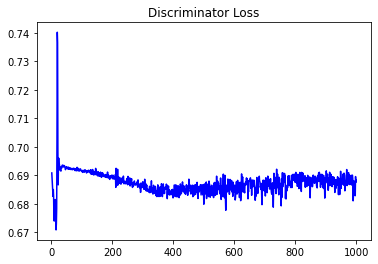

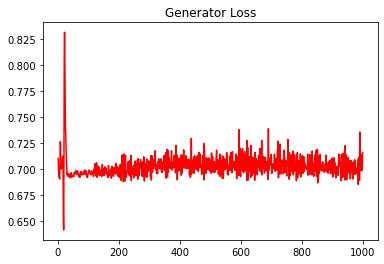

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13182718402222443


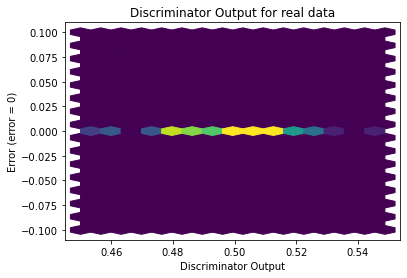

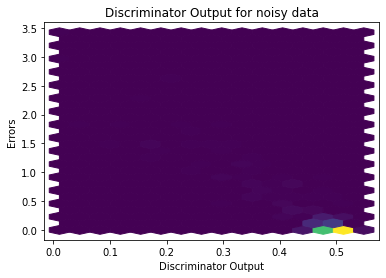

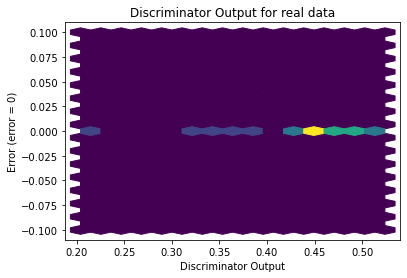

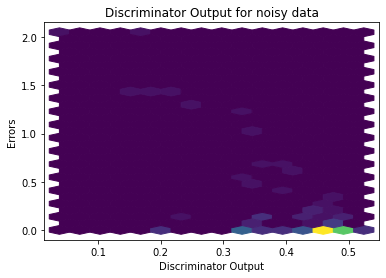

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


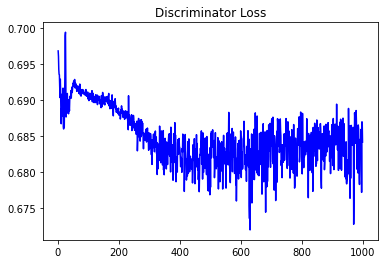

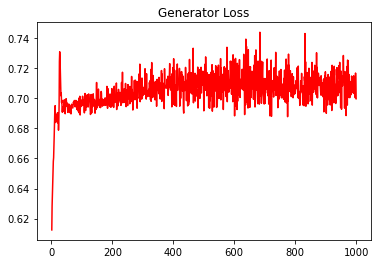

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11315130348518387


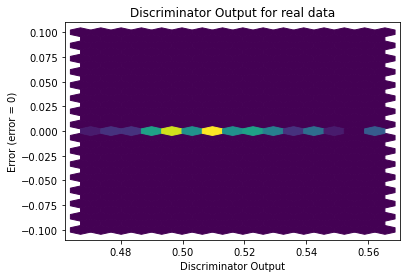

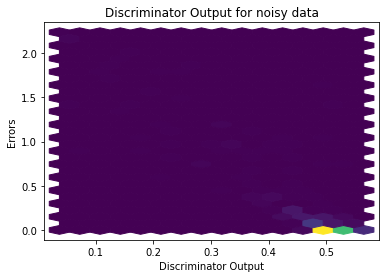

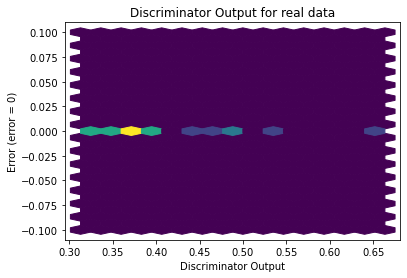

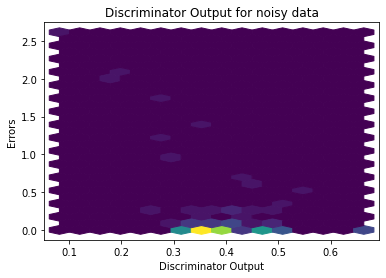

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7706]], requires_grad=True)
